# Chapter 21:  Quantum Perceptron
### Qiskit 2.x

A quantum Perceptron can be used as building block of larger sy0stems, it can  process an arbitrary number of input vectors in parallel  
when the input is presented in superposition $| \psi   \rangle $ representing the whole data set  $DB$  of $s$  objects $\textbf{x}_k$

\begin{equation}
 \{\textbf{x}_k \in DB~ |~ k \in \{1.. s\}\}. 

 \end{equation}
 with

\begin{equation}
| \psi   \rangle =  \frac{1}{\sqrt{s}} \sum_{k=1}^s  |\textbf{x}_k  \rangle 

\end{equation}

and then can be further processed

In this example we implement a quantum Perceptron with $D=2$ and two control qubits ($m=2$)  qubit $0$ and  with qubit  $2$ and $3$ representing the input and qubit $4$ the bias $x_0=1$

In [1]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator, Aer
from qiskit.visualization import plot_histogram
from math import pi
from qiskit.circuit.library import QFT

In [2]:
qc = QuantumCircuit(5, 2)

#Free Parameters set by the User
#---------------------------------
#Setting the values of weihts
w0=0
w1=1
w2=1
#Setting the Input x1=qubit 2, x2=qubit 3
qc.x(2)
qc.x(3)
#---------------------------------
#constant values with N=m-1 (m number of controll qubits)
N=1
qc.h(0)
qc.h(1)
#Bias w0 qubit 4
qc.x(4)

qc.barrier()
#qc.cp(lambda, control, target)
#w1
qc.cp(w1*pi/(2*N), 0, 2)
#w2
qc.cp(w2*pi/(2*N), 0, 3)
#w0
qc.cp(w0*pi/(2*N), 0, 4)
qc.barrier()
#w1
qc.cp(w1*pi/(2*N), 1, 2)
qc.cp(w1*pi/(2*N), 1, 2)
#w2
qc.cp(w2*pi/(2*N), 1, 3)
qc.cp(w2*pi/(2*N), 1, 3)
#w0
qc.cp(w0*pi/(2*N), 1, 4)
qc.cp(w0*pi/(2*N), 1, 4)
qc.barrier()

qc = qc.compose(QFT(2, inverse=True), [0,1])

qc.barrier()

qc.measure(0,0)
qc.measure(1,1)


qc.draw(fold=200)

┌───┐ ░                           ░                                                    ░ ┌──────────┐ ░ ┌─┐   
q_0: ┤ H ├─░──■────────■────────■──────░────────────────────────────────────────────────────░─┤0         ├─░─┤M├───
     ├───┤ ░  │        │        │      ░                                                    ░ │  IQFT_dg │ ░ └╥┘┌─┐
q_1: ┤ H ├─░──┼────────┼────────┼──────░──■────────■────────■────────■────────■──────■──────░─┤1         ├─░──╫─┤M├
     ├───┤ ░  │P(π/2)  │        │      ░  │P(π/2)  │P(π/2)  │        │        │      │      ░ └──────────┘ ░  ║ └╥┘
q_2: ┤ X ├─░──■────────┼────────┼──────░──■────────■────────┼────────┼────────┼──────┼──────░──────────────░──╫──╫─
     ├───┤ ░           │P(π/2)  │      ░                    │P(π/2)  │P(π/2)  │      │      ░              ░  ║  ║ 
q_3: ┤ X ├─░───────────■────────┼──────░────────────────────■────────■────────┼──────┼──────░──────────────░──╫──╫─
     ├───┤ ░                    │P(0)  ░                                      │P(0)  │P(0)  ░              ░  ║  ║ 
q_4: ┤ X ├─░────────────────────■──────░──────────────────────────────────────■──────■──────░──────────────░──╫──╫─
     └───┘ ░                           ░                                                    ░              ░  ║  ║ 
c: 2/═════════════════════════════════════════════════════════════════════════════════════════════════════════╩══╩═
                                                                                                              0  1

A  a quantum Perceptron with $D=2$ and two control qubits ($m=2$)  qubit $0$ and  with qubit  $2$ and $3$ representing the input $x_1=1$, $x_2=1$ and qubit $4$ the bias $x_0=1$ and the weights $w_0=0$, $w_1=1$ and $w_2=1$.


Total count are: {'10': 1000}


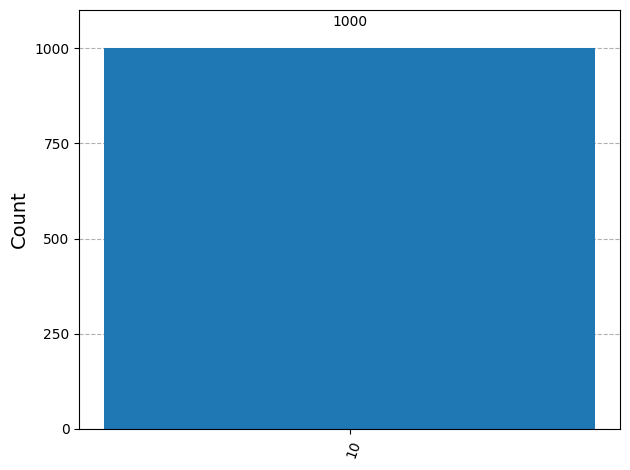

In [3]:
simulator = Aer.get_backend('qasm_simulator')
result=simulator.run(qc.decompose(),shots=1000).result()
counts = result.get_counts()
print("\nTotal count are:",counts)
plot_histogram(counts)

he measured value of $net=2$  for the input $x_1=1$, $x_2=1$  and the weights $w_0=0$, $w_1=1$ and $w_2=1$.

For the input $x_1=1$, $x_2=1$  and the weights $w_0=0$, $w_1=0.6$ and $w_2=1$

In [4]:
qc = QuantumCircuit(5, 2)

#Free Parameters set by the User
#---------------------------------
#Setting the values of weihts
w0=0
w1=0.6
w2=1
#Setting the Input x1=qubit 2, x2=qubit 3
qc.x(2)
qc.x(3)
#---------------------------------
#constant values with N=m-1 (m number of controll qubits)
N=1
qc.h(0)
qc.h(1)
#Bias w0 qubit 4
qc.x(4)

qc.barrier()
#qc.cp(lambda, control, target)
#w1
qc.cp(w1*pi/(2*N), 0, 2)
#w2
qc.cp(w2*pi/(2*N), 0, 3)
#w0
qc.cp(w0*pi/(2*N), 0, 4)
qc.barrier()
#w1
qc.cp(w1*pi/(2*N), 1, 2)
qc.cp(w1*pi/(2*N), 1, 2)
#w2
qc.cp(w2*pi/(2*N), 1, 3)
qc.cp(w2*pi/(2*N), 1, 3)
#w0
qc.cp(w0*pi/(2*N), 1, 4)
qc.cp(w0*pi/(2*N), 1, 4)
qc.barrier()

qc = qc.compose(QFT(2, inverse=True), [0,1])

qc.barrier()

qc.measure(0,0)
qc.measure(1,1)


qc.draw(fold=200)

┌───┐ ░                             ░                                                        ░ ┌──────────┐ ░ ┌─┐   
q_0: ┤ H ├─░──■──────────■────────■──────░────────────────────────────────────────────────────────░─┤0         ├─░─┤M├───
     ├───┤ ░  │          │        │      ░                                                        ░ │  IQFT_dg │ ░ └╥┘┌─┐
q_1: ┤ H ├─░──┼──────────┼────────┼──────░──■──────────■──────────■────────■────────■──────■──────░─┤1         ├─░──╫─┤M├
     ├───┤ ░  │P(3π/10)  │        │      ░  │P(3π/10)  │P(3π/10)  │        │        │      │      ░ └──────────┘ ░  ║ └╥┘
q_2: ┤ X ├─░──■──────────┼────────┼──────░──■──────────■──────────┼────────┼────────┼──────┼──────░──────────────░──╫──╫─
     ├───┤ ░             │P(π/2)  │      ░                        │P(π/2)  │P(π/2)  │      │      ░              ░  ║  ║ 
q_3: ┤ X ├─░─────────────■────────┼──────░────────────────────────■────────■────────┼──────┼──────░──────────────░──╫──╫─
     ├───┤ ░                      │P(0)  ░                                          │P(0)  │P(0)  ░              ░  ║  ║ 
q_4: ┤ X ├─░──────────────────────■──────░──────────────────────────────────────────■──────■──────░──────────────░──╫──╫─
     └───┘ ░                             ░                                                        ░              ░  ║  ║ 
c: 2/═══════════════════════════════════════════════════════════════════════════════════════════════════════════════╩══╩═
                                                                                                                    0  1


Total count are: {'01': 303, '00': 64, '10': 555, '11': 78}


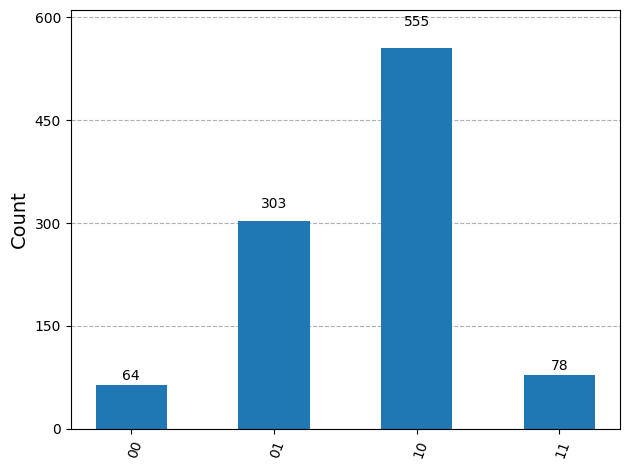

In [5]:
simulator = Aer.get_backend('qasm_simulator')
result=simulator.run(qc.decompose(),shots=1000).result()
counts = result.get_counts()
print("\nTotal count are:",counts)
plot_histogram(counts)

 The measured value of $net$  for the input $x_1=1$, $x_2=1$  and the weights $w_0=0$, $w_1=0.6$ and $w_2=1$ is in superposition between $2$ and $1$ ($net=1.6$)